In [1]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

url_ms1718 = 'https://raw.githubusercontent.com/AngelaBurgaleta/TFM_NHANES/main/METSYM_prevalence/ms1718.csv'
url17_18 = "https://raw.githubusercontent.com/AngelaBurgaleta/TFM_NHANES/main/download_data/merged/nhanes_2017_2018.csv"


data17_18 = pd.read_csv(url17_18)
ms1718 = pd.read_csv(url_ms1718)

#ALQ130

bebidas alcoholicas durante los ultimos 12 meses.

del 1 al 13 
15 
777, 999, . -> Missing (voy a poner que cero)

In [ ]:
#RECOPILACION PREPROCESADO PARA ESTUDIAR LA PREVALENCIA DE ALCOHOLEMIA ENTRE PERSONAS CON SINDROME METABOLICO
vars_merge = ['SEQN', 'ALQ130', 'RIAGENDR', 'RIDAGEYR']
data1718_alq = data17_18[vars_merge]
vars_merge_ms = ['SEQN', 'MET_SYM']
ms1718_alq = ms1718[vars_merge_ms]

ms1718_alqmerge= pd.merge(data1718_alq, ms1718_alq, on='SEQN')
ms1718_alqmerge= ms1718_alqmerge.dropna(subset=['ALQ130'])

ms1718_alqmerge['ALQ130'] = ms1718_alqmerge.ALQ130.replace({999: 0})
ms1718_alqmerge['ALQ130'] = ms1718_alqmerge.ALQ130.replace({777: 0})

ms1718_alqmetsym = ms1718_alqmerge[ms1718_alqmerge['MET_SYM'] == 1]








In [2]:
data17_18.shape

(6161, 40)

In [3]:
ms1718.shape

(6161, 20)

In [4]:
porcentaje_METSYM_1718 = 100 * ms1718['MET_SYM'].value_counts() / len(ms1718['MET_SYM'])
print(porcentaje_METSYM_1718)

0    58.983931
1    41.016069
Name: MET_SYM, dtype: float64


In [5]:
vars_merge = ['SEQN', 'ALQ130', 'RIAGENDR', 'RIDAGEYR']
data1718_alq = data17_18[vars_merge]
data1718_alq.shape
vars_merge_ms = ['SEQN', 'MET_SYM']
ms1718_alq = ms1718[vars_merge_ms]

In [6]:
ms1718_alq.shape

(6161, 2)

In [7]:
ms1718_alqmerge= pd.merge(data1718_alq, ms1718_alq, on='SEQN')

In [8]:
ms1718_alqmerge.shape

(6161, 5)

In [9]:
ms1718_alqmerge.head()

,SEQN,ALQ130,RIAGENDR,RIDAGEYR,MET_SYM
0,93705,1.0,2.0,66.0,0
1,93706,NaN,1.0,18.0,0
2,93708,NaN,2.0,66.0,1
3,93709,NaN,2.0,75.0,1
4,93711,1.0,1.0,56.0,0


In [10]:
ms1718_alqmerge['ALQ130'].unique()

array([  1.,  nan,   3.,   2.,  15.,   5.,   4.,   6.,   8.,  12.,   7.,
        10., 999.,   9., 777.,  13.,  11.])

In [11]:
ms1718_alqmerge['ALQ130'].value_counts()

1.0      1317
2.0      1040
3.0       479
4.0       247
5.0       130
6.0       118
8.0        40
12.0       38
10.0       25
7.0        24
15.0       19
9.0         8
999.0       5
13.0        3
777.0       1
11.0        1
Name: ALQ130, dtype: int64

In [12]:
ms1718_alqmerge.isna().sum()

SEQN           0
ALQ130      2666
RIAGENDR       0
RIDAGEYR       0
MET_SYM        0
dtype: int64

In [13]:
ms1718_alqmerge= ms1718_alqmerge.dropna(subset=['ALQ130'])

In [14]:
ms1718_alqmerge.shape

(3495, 5)

In [15]:
ms1718_alqmerge['ALQ130'] = ms1718_alqmerge.ALQ130.replace({999: 0})
ms1718_alqmerge['ALQ130'] = ms1718_alqmerge.ALQ130.replace({777: 0})

In [16]:
'''
Con el alcohol voy a hacer: 
0, 777, 999: abstemios
1: grupo frecuencia uno que ira de 1 a 5 bebidas 
2: grupo de 6 a 9
3: grupo de 10 a 14
4: grupo más de 15
'''

#ms1718_alqmerge.loc[ ms1718_alqmerge['ALQ130'] = 0, 'ALQ130'] = 0
ms1718_alqmerge.loc[(ms1718_alqmerge['ALQ130'] > 0) & (ms1718_alqmerge['ALQ130'] <= 3), 'ALQ130'] = 1
ms1718_alqmerge.loc[(ms1718_alqmerge['ALQ130'] > 3) & (ms1718_alqmerge['ALQ130'] <= 7), 'ALQ130'] = 2
ms1718_alqmerge.loc[(ms1718_alqmerge['ALQ130'] > 7) & (ms1718_alqmerge['ALQ130'] <= 14), 'ALQ130'] = 3
ms1718_alqmerge.loc[ ms1718_alqmerge['ALQ130'] > 14, 'ALQ130'] = 4

In [17]:
ms1718_alqmerge['ALQ130'].value_counts()

1.0    2836
2.0     519
3.0     115
4.0      19
0.0       6
Name: ALQ130, dtype: int64

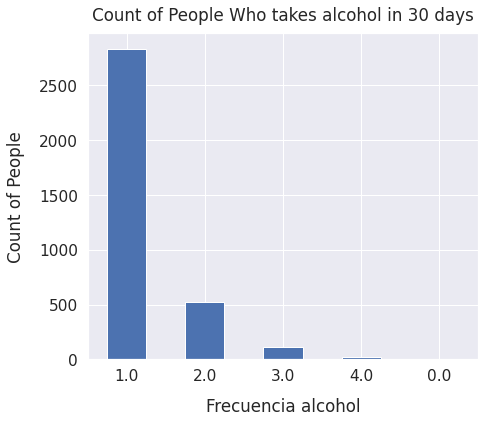

In [18]:
sns.set(font_scale=1.4)
ms1718_alqmerge['ALQ130'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Frecuencia alcohol", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Count of People Who takes alcohol in 30 days", y=1.02);

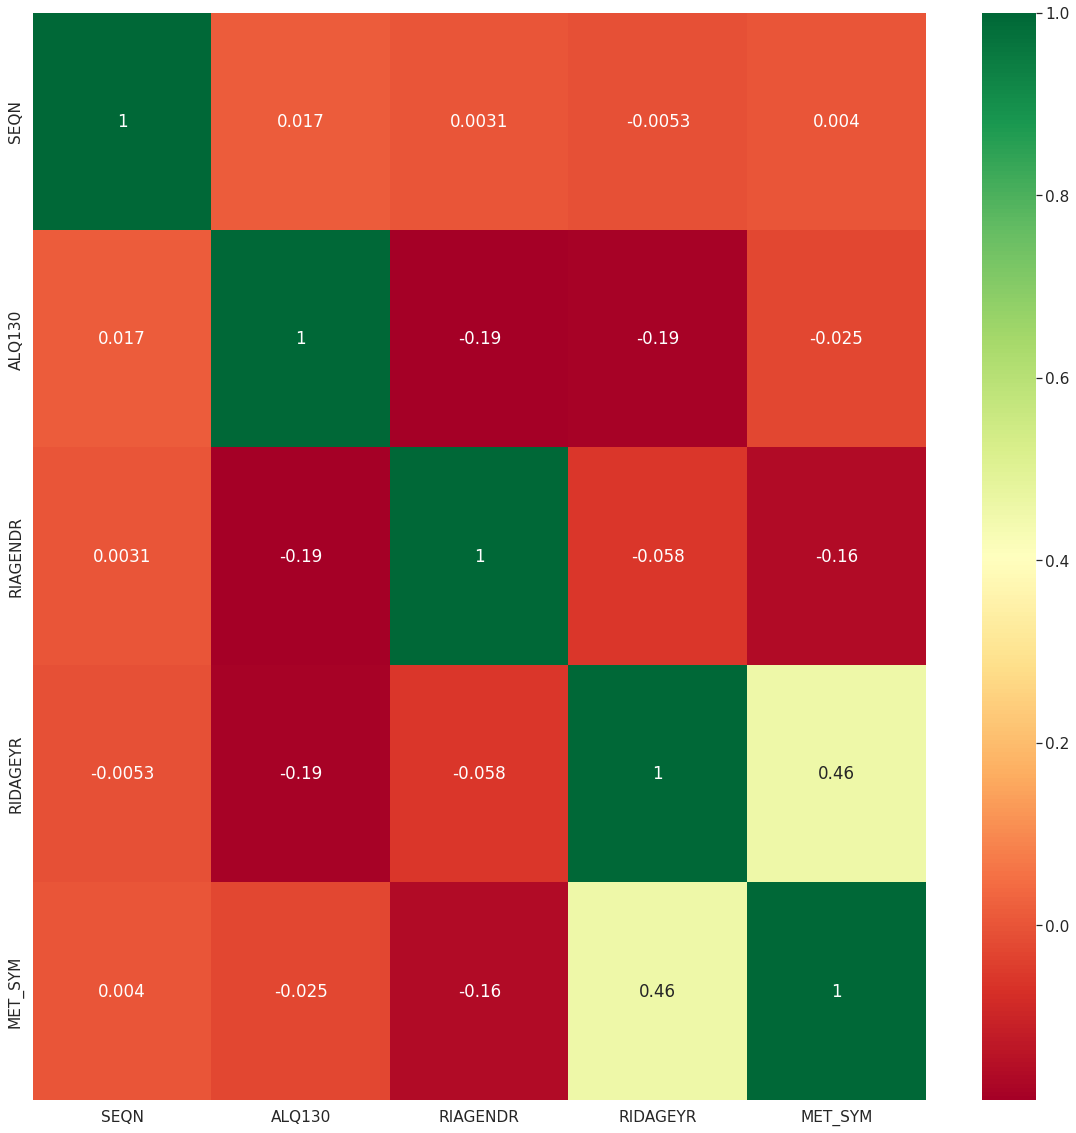

In [19]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = ms1718_alqmerge.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(ms1718_alqmerge[top_corr_features].corr(),annot=True,cmap="RdYlGn")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


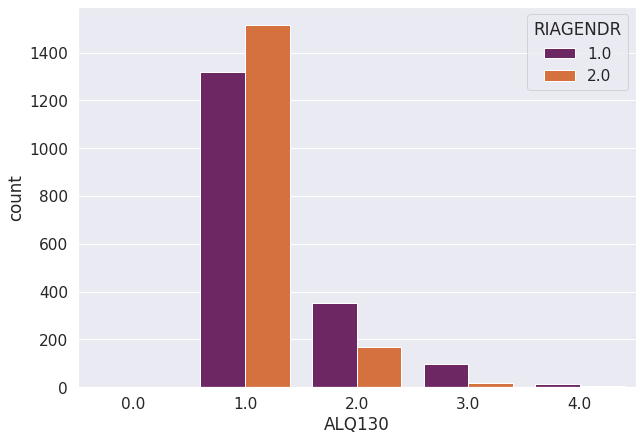

In [20]:
plt.figure(figsize=(10,7))
sns.countplot("ALQ130",hue="RIAGENDR",data=ms1718_alqmerge,palette="inferno")



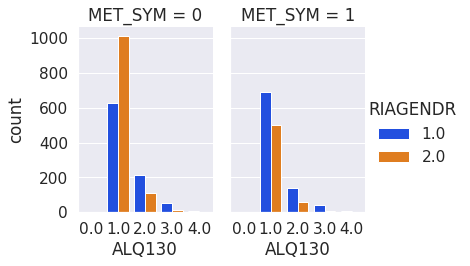

In [21]:
#pastel, dark, bright, inferno, mute
g = sns.catplot(x="ALQ130", hue="RIAGENDR", col="MET_SYM",
                data=ms1718_alqmerge, kind="count", palette='bright',
                height=4, aspect=.7)

In [22]:
ms1718_alqmetsym = ms1718_alqmerge[ms1718_alqmerge['MET_SYM'] == 1]
ms1718_alqmetsym.head()


,SEQN,ALQ130,RIAGENDR,RIDAGEYR,MET_SYM
7,93714,1.0,2.0,54.0,1
9,93716,1.0,1.0,61.0,1
12,93721,1.0,2.0,60.0,1
15,93726,1.0,2.0,67.0,1
17,93728,1.0,1.0,53.0,1


In [23]:
ms1718_alqmetsym['ALQ130']
porcentaje_alqmetsym = 100 * ms1718_alqmetsym['ALQ130'].value_counts() / len(ms1718_alqmetsym['ALQ130'])
print(porcentaje_alqmetsym)
#Conclusion: el 82% se situa en un consumo bastante ocasional. 

1.0    82.708333
2.0    13.541667
3.0     3.194444
4.0     0.486111
0.0     0.069444
Name: ALQ130, dtype: float64


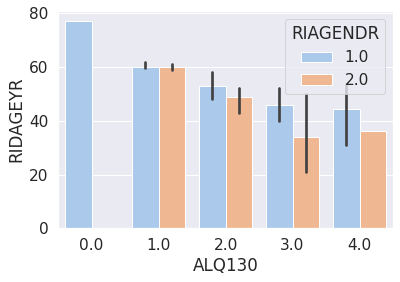

In [31]:
plt.plot(ms1718_alqmetsym['RIDAGEYR'], ms1718_alqmetsym['ALQ130'])
sns.barplot(x='ALQ130', y = 'RIDAGEYR', hue='RIAGENDR', data=ms1718_alqmetsym, estimator=np.median, palette='pastel')

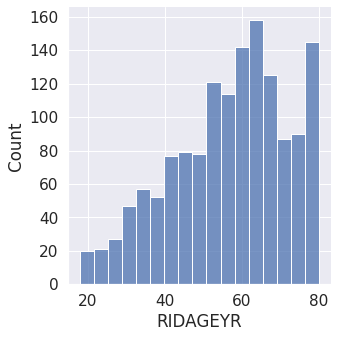

In [35]:
sns.displot(ms1718_alqmetsym['RIDAGEYR'])

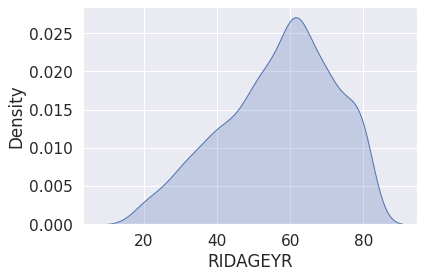

In [36]:
sns.kdeplot(ms1718_alqmetsym['RIDAGEYR'], shade = True)

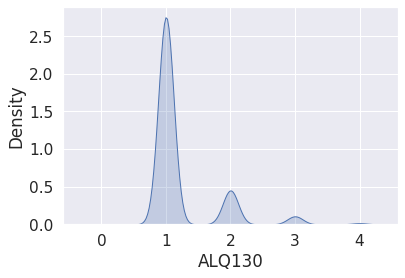

In [37]:
sns.kdeplot(ms1718_alqmetsym['ALQ130'], shade = True)

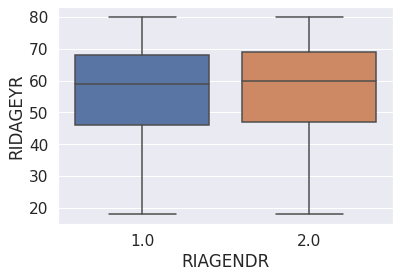

In [38]:
sns.boxplot(data=ms1718_alqmetsym, x='RIAGENDR', y='RIDAGEYR')

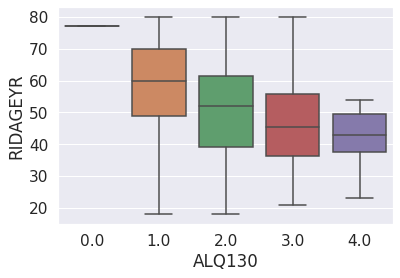

In [40]:
sns.boxplot(data=ms1718_alqmetsym, x='ALQ130', y='RIDAGEYR')

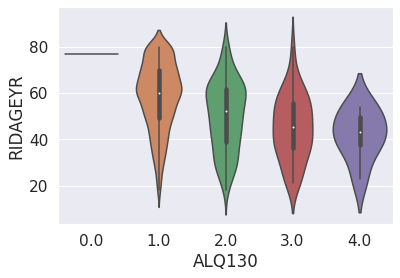

In [41]:
sns.violinplot(data=ms1718_alqmetsym, x='ALQ130', y='RIDAGEYR')
